##Estudiante: Conde Ajururo Cristhian

2) A través del archivo Clientes Mayoristas data.csv, utilice las herramientas vistas en clases para agrupar los datos para que podamos ver los productos que son comprados juntos por los clientes.

Si podemos predecir este comportamiento del cliente, podemos organizar la tienda, en consecuencia aumentará las ventas de los artículos.

Separe la distribución de datos utilizando el algoritmo de k-means, reduciendo la dimensionalidad de los datos a 2 dimensiones.


In [108]:
import numpy as np
import pandas as pd

In [109]:
data= pd.read_csv('/content/drive/MyDrive/Clientes Mayoristas data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [110]:
### Datos de Muestra ###
# Se seleccionan unos datos al azar para posteriormente verificar el clúster al que pertenecen
indices = [26,99, 176,428]
muestras = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop=True)
data = data.drop(indices, axis = 0)


In [111]:
### Procesamiento de los datos ###
# Eliminamos las columnas de región y canal
data = data.drop(['Region', 'Channel'], axis=1)
muestras = muestras.drop(['Region', 'Channel'], axis=1)

In [112]:
# Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [113]:
#Aplicamos PCA a nuestra data_escalada
from sklearn.decomposition import PCA
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(data_escalada)
pca = modelo_pca.transform(data_escalada) 
pca

array([[ 3.14463396e-02, -1.80547560e-01],
       [ 3.48595738e-01, -4.67370826e-02],
       [ 3.02861948e-01,  5.61413159e-02],
       [-3.85508129e-01,  1.63146870e-01],
       [-3.20817929e-01, -7.60068583e-02],
       [ 3.46568359e-02, -1.20163143e-01],
       [-1.22245715e-01, -2.42322356e-01],
       [ 2.37681825e-01, -1.03299252e-01],
       [ 1.63493073e-01, -1.87409079e-01],
       [ 5.66810069e-01, -1.08508797e-01],
       [ 5.48797566e-01,  8.79042271e-02],
       [-3.82417333e-01, -1.62092967e-01],
       [-2.19413353e-01, -2.19213229e-01],
       [-4.35390678e-02, -1.72413168e-01],
       [-1.36236352e-01, -2.35798439e-01],
       [-3.37347516e-01, -2.29730501e-01],
       [ 7.24089519e-01, -7.29190676e-02],
       [ 4.86252574e-02,  7.07082682e-03],
       [-1.41591931e-01, -1.50296356e-01],
       [ 1.62751353e-01, -2.11213038e-01],
       [-3.36125355e-01, -1.79560748e-01],
       [-3.25798798e-01,  2.40352549e-01],
       [-5.00659140e-01,  4.28826466e-02],
       [ 2.

In [114]:
### Análisis de Machine Learning con K-Means ###
from sklearn.cluster import KMeans

# Se determina las variables a evaluar
X = pca.copy()

## Hallar el valor óptimo de K ##
# Se aplicará el método de codo para hallar K
# Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = []
for i in range(1,15):
    algoritmo = KMeans(n_clusters=i, init='k-means++', 
                      max_iter=300, n_init=10)
    algoritmo.fit(X)
    # Para cada K, secalcula la suma total
# Para cada K, secalcula la suma total del cuadrado errores dentro del clúster
    inercia.append(algoritmo.inertia_)


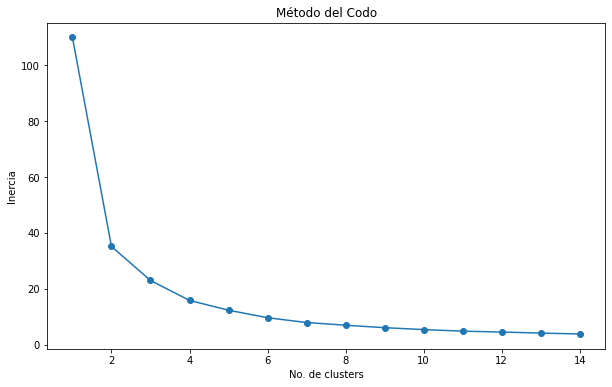

In [115]:
#Se traza la curva de la suma de errores cuadráticos 
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 15)), inercia, marker='o')
plt.show()

In [116]:
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
#se define como el n_clusters = 5 dada por el metodo del codo
algoritmo = KMeans(n_clusters = 5, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

#Se entrena el algoritmo
algoritmo.fit(data_escalada)

#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 3
Muestra 2 se encuentra en el clúster: 0
Muestra 3 se encuentra en el clúster: 1


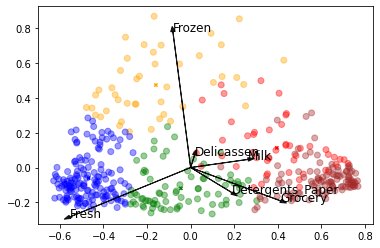

In [117]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 10, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0009, head_width = 0.02, alpha = 0.90)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=5,fontsize=12)

plt.show()

En el siguiente grafico obtenido aplicando pca para reducir la dimensionalidad de los datos y poder estos graficarlos en un plan podemos observar 5 
agrupaciones donde esta nos describe que tipos de productos son estan mas correlacionados con otros, los procuctos congelados (FROZEN) pueden estar agrupados con algunos productos lacteos (MILK)como tambien con algunas productos vegetales (FRESH), sin embargo estos no es recomendable que esten agrupados con los detergentes(DETERGENT), alimentos procesados (GROCERY) y los productos de oficina(PAPER), pero el producto que muestra mas esparcimiento son las golosinas (DELICASSEN), entonces las golosinas pueden ser las mas adecuadas a sugerir a cualquier compra que haga el cliente.

